## Building an ETL data pipeline


### Importing packages


In [86]:
import pandas as pd
import matplotlib.pyplot as plt


### extracting the data

In [17]:
def extract():
    data1 = pd.read_csv('dataset1.csv')
    data2 = pd.read_csv('dataset2.csv')
    return data1,data2

### Transform the data

Transforming data steps:

    1) creation of a new attribute (Age) in the second dataset
    2) renaming the columns (giving the columns simpler and more descriptive names)
    3) standardising the attributes types for matching
    4) merge datasets (inner join) using Name, Age,Gender
    5) dropping duplicate values, as it might be inconsistent due to :
        - identical ages and names for two or more different persons
        - redundant data
    6) impute null values
 
    

#### Creating new columns

In [18]:
def createNewColumns(data1 , data2):
    data2['Age'] = data2['Death year'] - data2['Birth year']
    return data1, data2

#### Renaming columns

In [19]:
def renameColumns(data1, data2):
    data1 = data1.rename(columns = {'Short description':'short_description' , 'Age of death' : 'Age'})
    data2 = data2.rename(columns = {'Birth year' : 'Birth_year' , 'Death year' : 'Death_year' , 'Manner of death' : 'death_reason'})
    return data1, data2
    

#### Transforming data types

In [20]:
def attributeTypesTransform(data1,data2):
    data1['Age'] = data1['Age'].round().astype(int)
    data2['Gender'] = data2['Gender'].replace({1.0 : 'Male' , 2.0 : 'Female'})
    data2['Age'] = data2['Age'].round().astype(int)
    return data1, data2

#### Merging data sets

In [21]:
def mergeDatasets(data1, data2):
    mergedData = pd.merge(data1 , data2 , on=['Name', 'Age','Gender'], how='inner')
    return mergedData

#### Dropping duplicate values

In [22]:
def dropDuplicates(mergedData):
    mergedData.drop_duplicates()
    return mergedData

#### impute the data:

    short_description: Fill missing values with "No description available"
    Gender: Use the mode (most frequent value)
    Occupation: Fill with "Unknown"
    Country: Fill with "Unknown"
    death_reason: Fill with "Not specified"

In [23]:
def imputeNullData(mergedData):
    mergedData.fillna({
        'short_description':'No description available' ,
        'Occupation': 'Unknown', 'Gender': mergedData['Gender'].mode()[0],
        'Country': 'Unknown', 'death_reason':'Not specified'}, inplace=True)
    return mergedData

### The Transform function that contains the logic 

In [24]:
def transform(data1, data2):
    data1 , data2 = createNewColumns(data1 , data2)
    data1 = data1.dropna(subset=['Age of death'])
    data1, data2 = renameColumns(data1, data2)   
    data1, data2 = attributeTypesTransform(data1,data2)
    mergedData = mergeDatasets(data1, data2)
    mergedData = dropDuplicates(mergedData)
    mergedData = imputeNullData(mergedData)
    return mergedData

### Loading the data

In [25]:
def load(mergedData):
    mergedData.to_csv('mergedData.csv', index=False)


### Running the pipeline

In [26]:
data1, data2 = extract()

In [27]:
mergedData = transform(data1, data2)

In [28]:
load(mergedData)

## Exploring the new dataset

In [29]:
mergedData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 647837 entries, 0 to 647836
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Name               647837 non-null  object 
 1   short_description  647837 non-null  object 
 2   Gender             647837 non-null  object 
 3   Occupation         647837 non-null  object 
 4   Age                647837 non-null  int32  
 5   Country            647837 non-null  object 
 6   Birth_year         647837 non-null  int64  
 7   Death_year         647837 non-null  float64
 8   death_reason       647837 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(6)
memory usage: 47.0+ MB


In [30]:
mergedData.describe()

,Age,Birth_year,Death_year
count,647837.000000,647837.000000,647837.000000
mean,69.309004,1844.752007,1914.061011
std,16.601248,147.963482,151.703546
min,0.000000,-2284.000000,-2200.000000
25%,60.000000,1827.000000,1894.000000
50%,72.000000,1887.000000,1955.000000
75%,81.000000,1918.000000,1994.000000
max,169.000000,2016.000000,2021.000000


<Axes: >

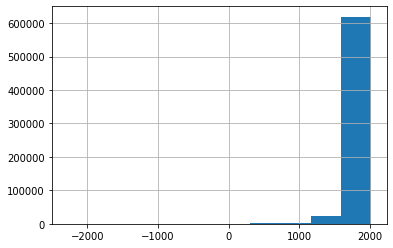

In [31]:
mergedData['Birth_year'].hist()

#### 1. Gender Distribution:

In [34]:
# Gender in the old datasets:
data1['Gender']

0         Male
1          NaN
2         Male
3         Male
4         Male
          ... 
917126    Male
917127    Male
917128    Male
917129    Male
917130    Male
Name: Gender, Length: 917131, dtype: object

In [49]:
valueCountsOfData1 = data1['Gender'].value_counts(normalize=True) * 100
valueCountsOfData1

Male      90.065539
Female     9.934461
Name: Gender, dtype: float64

In [50]:
valueCountsOfData2 = data2['Gender'].value_counts(normalize=True) * 100
valueCountsOfData2

1.0    90.119458
2.0     9.880542
Name: Gender, dtype: float64

In [53]:
# genders in the new dataset: 
mergedData['Gender'].value_counts(normalize=True)*100

Male      91.24749
Female     8.75251
Name: Gender, dtype: float64

all the datasets has an obvious bias towards the Male gender, but the merged dataset contains more males percent than the others

#### 2. Geographic Representation:


In [55]:
# we will compare the old data set (dataset2) with the new merged dataset
data2['Country']

0           Chen dynasty
1                    NaN
2              Australia
3                Germany
4         Czechoslovakia
               ...      
855984               NaN
855985            Poland
855986           Germany
855987         Argentina
855988           Germany
Name: Country, Length: 855989, dtype: object

 ##### countries most represented are:

<Axes: >

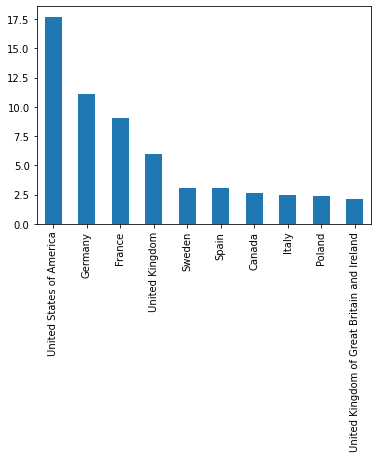

In [63]:
((data2['Country'].value_counts(normalize=True)*100).head(10)).plot(kind='bar')

<Axes: >

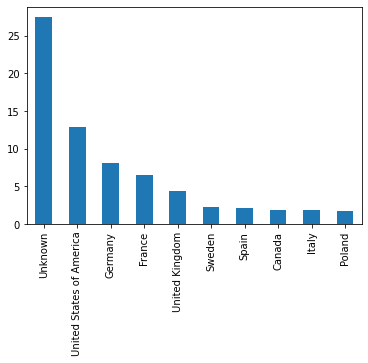

In [64]:
((mergedData['Country'].value_counts(normalize=True)*100).head(10)).plot(kind = 'bar')

After merging the two datasets, an unknown column represented the null values, but no discrepancies

### 3. Occupation Trends

In [95]:
MaleData = mergedData[mergedData['Gender'] == 'Male']

In [96]:
FemaleData = mergedData[mergedData['Gender'] == 'Female']

<Axes: >

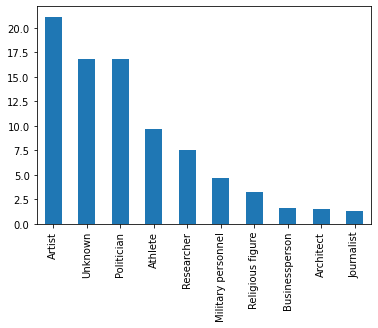

In [97]:
((MaleData['Occupation'].value_counts(normalize=True)*100).head(10)).plot(kind = 'bar')

<Axes: >

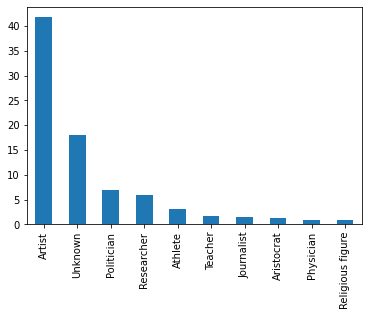

In [98]:
((FemaleData['Occupation'].value_counts(normalize=True)*100).head(10)).plot(kind = 'bar')

#### 4. Historical Patterns:


In [99]:
mergedData['Age'].mean()

69.30900365369683

the average of the whole dataset is near 69 years, but let's look into each gender through out all the data

In [100]:
MaleData['Age'].mean()

69.1235944412021

In [101]:
FemaleData['Age'].mean()

71.24194913759656

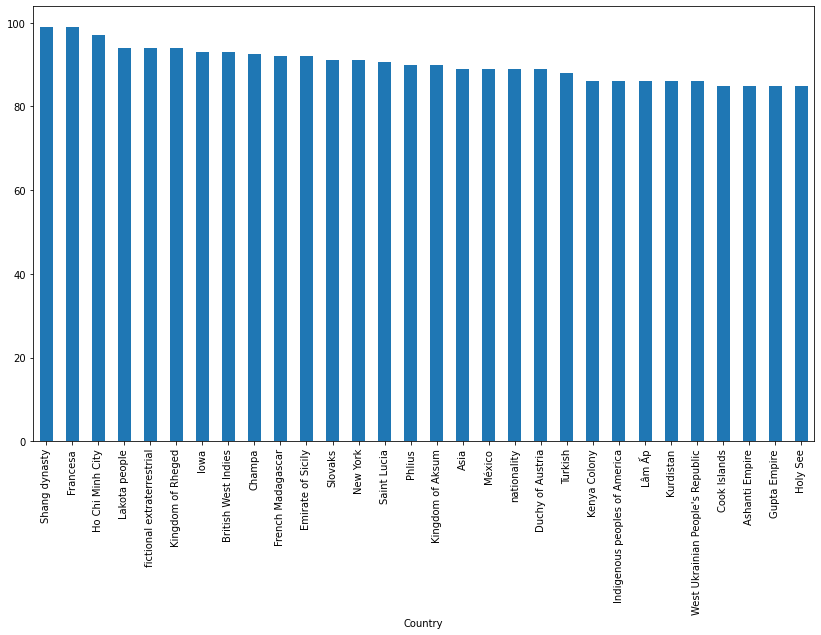

In [108]:
plt.figure(figsize=(14, 8))
mean_ages = (mergedData.groupby('Country')['Age'].mean().sort_values(ascending=False)).head(30).plot(kind = 'bar')

In [111]:
(mergedData.groupby('Country')['Age'].mean().sort_values(ascending=False)).head(30)

Country
Shang dynasty                       99.00
Francesa                            99.00
Ho Chi Minh City                    97.00
Lakota people                       94.00
fictional extraterrestrial          94.00
Kingdom of Rheged                   94.00
Iowa                                93.00
British West Indies                 93.00
Champa                              92.50
French Madagascar                   92.00
Emirate of Sicily                   92.00
Slovaks                             91.00
New York                            91.00
Saint Lucia                         90.75
Phlius                              90.00
Kingdom of Aksum                    90.00
Asia                                89.00
México                              89.00
nationality                         89.00
Duchy of Austria                    89.00
Turkish                             88.00
Kenya Colony                        86.00
Indigenous peoples of America       86.00
Lâm Ấp                    

The average Death age is diffrent in ancient countries than newer countries, we will try to visualize the data of newer times

In [118]:
newerData = mergedData[mergedData['Birth_year'] > 1500]

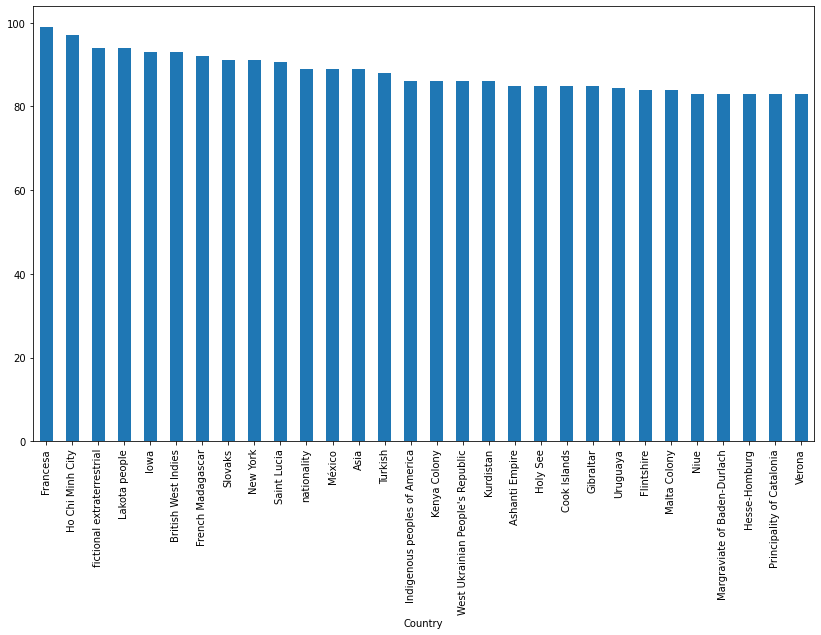

In [119]:
plt.figure(figsize=(14, 8))
mean_ages = (newerData.groupby('Country')['Age'].mean().sort_values(ascending=False)).head(30).plot(kind = 'bar')

The average has changed over newer periods of time

#### 5. Analysis of Missing Data:

After looking into the plots, the occupations does not vary much from male to female.

for dealing with such data , the best practice in this situation is to impute the null values with new values that refers to unknown to get the cleanest data set
but there are some recommendations for each column to get more out of the data we have

    1) Gender: we can derive the gender from the Name, but when using a better library and more complete libraries
    2) Occupation: can be derived from short_description, it might contain some insights, using NLP
    3) Country: can also derived from short_description using NLP techniques
    4) death_reason is the hardest, it can be derived from a set of attributes using ML techniques, mostly age, country, birth year, occupation, Gender but might add more bias to our data, as most of the records are "Male"
